<a href="https://colab.research.google.com/github/Robot-Autonomo-de-Laboratorio-BFMC/vision-artificial/blob/main/test_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pruebas con YOLOv5

configuracion inicial

In [ ]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5

# Navigate to the cloned directory
%cd yolov5

# Install required packages
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 17483 (delta 79), reused 30 (delta 30), pack-reused 17374 (from 4)
Receiving objects: 100% (17483/17483), 16.39 MiB | 32.14 MiB/s, done.
Resolving deltas: 100% (11984/11984), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.9 MB/s eta 0:00:00


# Prueba con imagenes
Esto es una prueba con YOLOv5 sin ningun entrenamiento extra, utilizando PyTorch

Clonamos el repositorio e instalamos las dependencias

Subimos un archivo para detectar

In [ ]:
from google.colab import files
uploaded = files.upload()  # Esto es para subir un archivo

Saving traffic sign.png to traffic sign.png


Corremos el codigo y vemos el output

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-5-25 Python-3.11.12 torch-2.6.0+cpu CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 139MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 587x311 1 stop sign
Speed: 38.3ms pre-process, 1065.4ms inference, 95.7ms NMS per image at shape (1, 3, 640, 352)


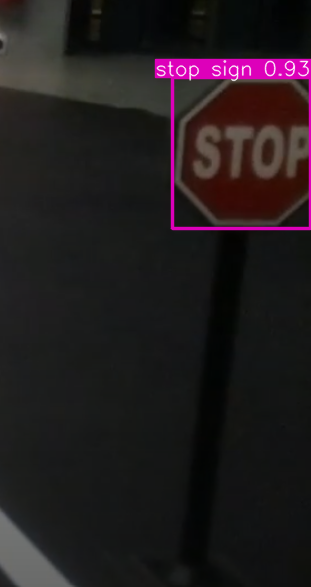

Saved 1 image to runs/detect/exp


In [ ]:
import torch

# Cargar modelo YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Obtener el nombre del archivo subido
img = list(uploaded.keys())[0]  # Toma el primer archivo subido

# Inferencia
results = model(img)
results.print()
results.show()
results.save()

# Prueba con videos
En este caso, utilizando el codigo detect.py que ya viene con el repositorio.

subimos el video

In [ ]:
from google.colab import files
uploaded = files.upload()  # Esto es para subir un archivo

TypeError: 'NoneType' object is not subscriptable

corremos la deteccion

In [ ]:
video =list(uploaded.keys())[0]

!python detect.py --weights yolov5s.pt --source $video


detect: weights=['yolov5s.pt'], source=bfmc2020_online_2.avi, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
video 1/1 (1/2002) /content/yolov5/bfmc2020_online_2.avi: 512x640 1 traffic light, 1 parking meter, 176.0ms
video 1/1 (2/2002) /content/yolov5/bfmc2020_online_2.avi: 512x640 1 traffic light, 1 parking meter, 148.0ms
video 1/1 (3/2002) /content/yolov5/bfmc2020_online_2.avi: 512x640 1 traffic light, 1 parking meter, 97.8ms
video 1/1 (4/2002) /content/yolov

Descargamos el resultado

In [ ]:
from google.colab import files

if video_files:
    print("Descargando:", video_files[0])
    files.download(video_files[0])
else:
    print("No se encontró ningún video en", last_folder)


NameError: name 'video_files' is not defined